# Kanerva's Table 7.3 (page 70)

In [1]:
from __future__ import print_function
import sdm as sdmlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bits = 1000
sample = 1000000
radius = 451
scanner_type = sdmlib.SDM_SCANNER_THREAD

In [3]:
address_space = sdmlib.AddressSpace.init_random(bits, sample)
counter = sdmlib.Counter.init_zero(bits, sample)
sdm = sdmlib.SDM(address_space, counter, radius, scanner_type)

In [4]:
for i in range(10000):
    if i%100 == 0:
        print('!', end='')
    b = sdmlib.Bitstring.init_random(bits)
    sdm.write(b, b)
print('')

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [5]:
b = sdmlib.Bitstring.init_random(1000)
sdm.write(b, b)

In [6]:
from IPython.display import clear_output
def run(z, samples=3):
    distances = []
    x = range(0, 1001)
    for i, dist in enumerate(x):
        clear_output(wait=True)
        print('z={:5s} Distance: {:4d} ({:.2f}%)'.format(str(z), dist, 100.*(i+1)/len(x)))
        v = []
        for j in range(samples):
            c = sdmlib.Bitstring.init_from_bitstring(b)
            c.flip_random_bits(dist)
            assert c.distance_to(b) == dist
            d = sdm.read(c, z=z)
            v.append(d.distance_to(b))
        distances.append((1.0*sum(v))/len(v))
    print('Done!')
    return distances

In [7]:
d = {}

In [8]:
#z_values = [None, 0, 0.5, 1, 1.5, 2, 2.5, 3]
z_values = [0, 1.5, 3]
for z in z_values:
    d[z] = run(z)

z=3     Distance: 1000 (100.00%)
Done!


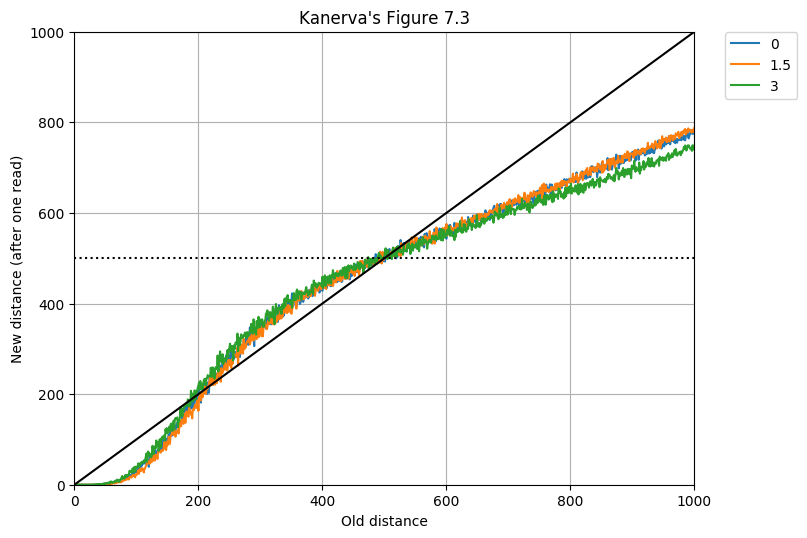

In [9]:
plt.figure(figsize=(8, 6), dpi=100)
x = list(range(0, 1001))
v = [(z, d[z]) for z in z_values]
for z, distances in v:
    plt.plot(x, distances, label=str(z))
plt.plot(x, x, 'k')
plt.plot(x, [500]*len(x), 'k:')
plt.title('Kanerva\'s Figure 7.3')
plt.ylabel('New distance (after one read)')
plt.xlabel('Old distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.axis([0, 1000, 0, 1000]);

In [ ]:
plt.figure()
for z, distances in d.items():
    plt.plot(x, distances, label=str(z))
plt.plot(x, x, 'k')
plt.plot(x, [500]*len(x), 'k:')
plt.title('Kanerva\'s Figure 7.3')
plt.ylabel('New distance (after one read)')
plt.xlabel('Old distance')
plt.grid()
plt.axis([0, 1000, 0, 1000]);

In [ ]:
import pickle
pickle.dump(d, open(b'table74.pickle', 'w'))